## Probelm Statement:

   * Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. 
   * We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

## Input Variables:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

## Output Variable:

Price: The price of the ticket

Importing the required libraries for this project

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the Train dataset and it is in excel format,

In [2]:
train = pd.read_excel("Data_Train.xlsx")
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Loading the test dataset and it is in excel format

In [3]:
test = pd.read_excel("Test_set.xlsx")
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Info() method explains the each and every column non null values and memory usage and it's data types and we can see 2 columns has null values and any way we will confirm that with isnull() method.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Test dataset has no null values and info() method explains about the column data types and index range entry and memory usage of dataset.


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Checking null values for train and test data as we already knows that test dataset don't have any null values.

In [6]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

As all the features are categorical data,we will see how the data has been distributed through visualizations,

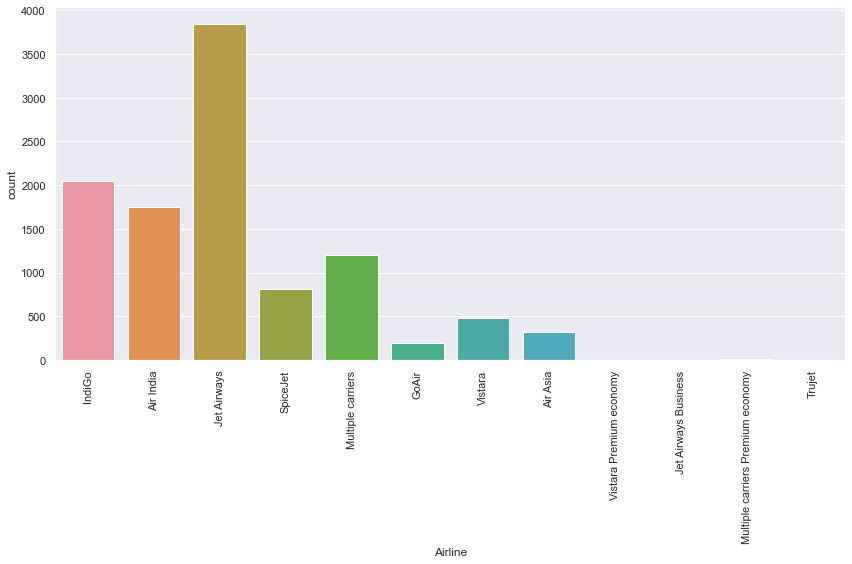

In [8]:
sns.set_theme()
plt.figure(figsize = (12,8))
sns.countplot(x = train['Airline'])
plt.xticks(rotation = 90)
plt.tight_layout()

The above plot shows that  jet airways airline is more in flights.

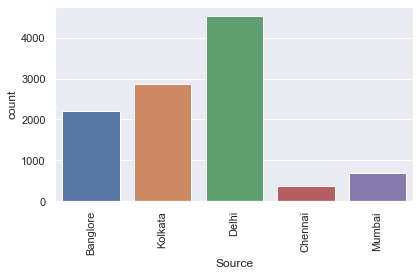

In [9]:
sns.countplot(x = train['Source'])
plt.xticks(rotation = 90)
plt.tight_layout()

The count plot shows that source of flights starts from Chennai, Bangalore,Delhi,Kolkata,Mumbai.
Most of the flights source is from DELHI and has less number of flights which starts from CHENNAI.

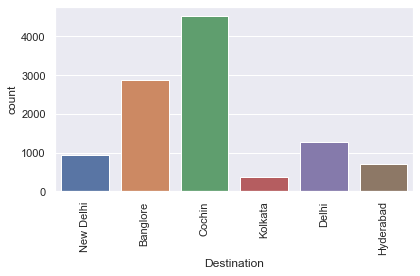

In [10]:
sns.countplot(x = train['Destination'])
plt.xticks(rotation = 90)
plt.tight_layout()

The above countplot shows that most flights has destination to COCHIN and least to KOLKATA.

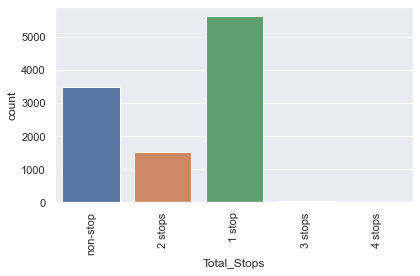

In [11]:
sns.countplot(x = train['Total_Stops'])
plt.xticks(rotation = 90)
plt.tight_layout()

From the above plot, we can tell that most of the flights has atleast 1 stop between source and destination.

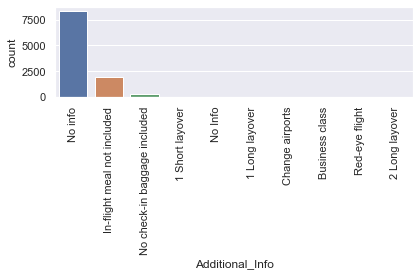

In [12]:
sns.countplot(x = train['Additional_Info'])
plt.xticks(rotation = 90)
plt.tight_layout()

Additional_Info will explains the information about flights and it has more values as no_info which is no information.

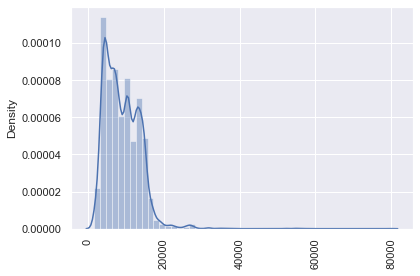

In [13]:
sns.distplot(x = train['Price'])
plt.xticks(rotation = 90)
plt.tight_layout()

Looking into the target variable PRICE, we can see that data is skewed rightly.

We will go ahead and clean the data as we have all data in OBJECT data type and need to do some feature engineering as well.

1) Airline - It contains the name of fligts.

2) date of journey - Has day,month,year.

3) source, destination - It has city name on it and need to replace into numerical data.

4) Arrival_Time, Dep_Time - This both columns has hours and minutes and we need to split this into 2 columns.

5) Route, No of Stops - These 2 columns are similar and explains the same thing.So we can drop one column.

6) Price - It is our target variable and numerical data.

Applying label Encoder technique to convert categorical into numerical values,

In [14]:
le = LabelEncoder()
cols = ['Airline','Source','Destination','Additional_Info']
for i in cols:
    train[cols]= train[cols].apply(le.fit_transform)
    test[cols]= test[cols].apply(le.fit_transform)

SOme of the columns like journey date,departure time,arrival time has date time as values,So using datetime index I am separating as day,month and time has hour and minute and dropping the original column from the dataset.

As this dataset is from same year -2019, I am taking only day and month for journey date.

In [15]:
train['journey_date'] = pd.DatetimeIndex(train['Date_of_Journey']).day
train['journey_month'] = pd.DatetimeIndex(train['Date_of_Journey']).month
train = train.drop(columns = ['Date_of_Journey'],axis = 1)

test['journey_date'] = pd.DatetimeIndex(test['Date_of_Journey']).day
test['journey_month'] = pd.DatetimeIndex(test['Date_of_Journey']).month
test = test.drop(columns = ['Date_of_Journey'],axis = 1)

In [16]:
train['dep_hr'] = pd.DatetimeIndex(train['Dep_Time']).hour
train['dep_min'] = pd.DatetimeIndex(train['Dep_Time']).minute
test['dep_hr'] = pd.DatetimeIndex(test['Dep_Time']).hour
test['dep_min'] = pd.DatetimeIndex(test['Dep_Time']).minute
train = train.drop(columns = ['Dep_Time'],axis = 1)
test = test.drop(columns = ['Dep_Time'],axis = 1)

In [17]:
train['Arrival_hr'] = pd.DatetimeIndex(train['Arrival_Time']).hour
train['Arrival_min'] = pd.DatetimeIndex(train['Arrival_Time']).minute
test['Arrival_hr'] = pd.DatetimeIndex(test['Arrival_Time']).hour
test['Arrival_min'] = pd.DatetimeIndex(test['Arrival_Time']).minute
train = train.drop(columns = ['Arrival_Time'],axis = 1)
test = test.drop(columns = ['Arrival_Time'],axis = 1)

Duration has time and string and I am splitting into hour and minute and dropping the actual column for train and test dataset.

In [18]:
train['Duration']= train['Duration'].str.split(' ')
train['duration_hr'] = train['Duration'].str[0]
train['duration_hr']= train['duration_hr'].str.split('h')
train['duration_hr'] = train['duration_hr'].str[0]


In [19]:
test['Duration']= test['Duration'].str.split(' ')
test['duration_hr'] = test['Duration'].str[0]
test['duration_hr']= test['duration_hr'].str.split('h')
test['duration_hr']= test['duration_hr'].str[0]

In [20]:
train['duration_min'] = train['Duration'].str[1]
train['duration_min'] = train['duration_min'].str.split('m')
train['duration_min'] =train['duration_min'].str[0]

In [21]:
test['duration_min'] = test['Duration'].str[1]
test['duration_min'] = test['duration_min'].str.split('m')
test['duration_min'] =test['duration_min'].str[0]

Let me check whether this particular column has any null values or not ,
We do not have any null values in duration_hr but we have null values fin minutes.

In [22]:
train[train['duration_min'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
2,4,2,1,DEL → LKO → BOM → COK,[19h],2 stops,8,13882,6,9,9,25,4,25,19,NaN
18,1,2,1,DEL → CCU → BOM → COK,[23h],2 stops,8,13381,6,12,20,15,19,15,23,NaN
33,4,2,1,DEL → NAG → BOM → COK,[22h],2 stops,5,10919,15,6,14,35,12,35,22,NaN
44,6,2,1,DEL → BOM → COK,[12h],1 stop,8,13062,21,3,9,0,21,0,12,NaN
53,3,0,2,BLR → DEL,[3h],non-stop,8,3943,18,6,21,15,0,15,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10591,4,2,1,DEL → ATQ → BOM → COK,[23h],2 stops,8,14300,6,12,20,0,19,0,23,NaN
10638,4,0,5,BLR → BOM → DEL,[14h],1 stop,5,7832,21,3,21,25,11,25,14,NaN
10639,1,2,1,DEL → RPR → NAG → BOM → COK,[38h],3 stops,8,10493,6,3,5,15,19,15,38,NaN
10673,4,2,1,DEL → AMD → BOM → COK,[15h],2 stops,8,16704,27,5,13,25,4,25,15,NaN


In [23]:
test[test['duration_min'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_date,journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
1,3,3,0,CCU → MAA → BLR,[4h],1 stop,5,5,12,6,20,10,20,4,NaN
3,6,2,1,DEL → BOM → COK,[13h],1 stop,5,21,5,8,0,21,0,13,NaN
29,6,2,1,DEL → BOM → COK,[7h],1 stop,5,6,1,14,0,21,0,7,NaN
33,4,0,2,BLR → DEL,[3h],non-stop,5,6,12,19,50,22,50,3,NaN
68,3,0,2,BLR → DEL,[3h],non-stop,5,6,12,21,15,0,15,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,4,2,1,DEL → BOM → COK,[11h],1 stop,5,6,9,8,0,19,0,11,NaN
2604,6,2,1,DEL → BOM → COK,[10h],1 stop,5,6,12,9,15,19,15,10,NaN
2607,6,2,1,DEL → BOM → COK,[13h],1 stop,5,3,3,8,0,21,0,13,NaN
2622,4,0,2,BLR → DEL,[3h],non-stop,3,5,3,17,45,20,45,3,NaN


Filling NaN values with '00' as some gtimes we will get time like 5h only..So in this case I am replacing those missing values as "00".

In [24]:
train['duration_min'] = train['duration_min'].fillna('00')

test['duration_min'] = test['duration_min'].fillna('00')

Dropping the actual column Duration from the dataset,

In [25]:
train = train.drop(columns = ['Duration'],axis = 1)
test = test.drop(columns = ['Duration'],axis = 1)

Dropping ROUTE column as this column and Total stops are same.

In [26]:
train = train.drop(columns = ['Route'],axis = 1)
test = test.drop(columns = ['Route'],axis = 1)

In [27]:
# Replacing categorical into numetrical values for train and test

train['Total_Stops']=train['Total_Stops'].replace({'1 stop': 0,'non-stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4})
test['Total_Stops']=test['Total_Stops'].replace({'1 stop': 0,'non-stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4})

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  int64  
 1   Source           10683 non-null  int64  
 2   Destination      10683 non-null  int64  
 3   Total_Stops      10682 non-null  float64
 4   Additional_Info  10683 non-null  int64  
 5   Price            10683 non-null  int64  
 6   journey_date     10683 non-null  int64  
 7   journey_month    10683 non-null  int64  
 8   dep_hr           10683 non-null  int64  
 9   dep_min          10683 non-null  int64  
 10  Arrival_hr       10683 non-null  int64  
 11  Arrival_min      10683 non-null  int64  
 12  duration_hr      10683 non-null  object 
 13  duration_min     10683 non-null  object 
dtypes: float64(1), int64(11), object(2)
memory usage: 1.1+ MB


We can see that duration_hr and min has data types as object.So we will change the datatype to integer.

In [29]:
train['duration_hr'] = train['duration_hr'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

As we are getting the above error,I think we have 5m as value in column.We need to check.

In [30]:
train[train['duration_hr']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
6474,1,4,3,2.0,8,17327,3,6,16,50,16,55,5m,00


As the total stops of the flight is 2 and we can see that duration will be 5m which is not possible.Hence dropping this values as it is a wrong data which is not possible in real time.

In [31]:
train.drop(index = 6474, inplace = True)

In [32]:
train['duration_hr'] = train['duration_hr'].astype(int)

Now we converted the data type to ointeger successfully and we will check for test dataset as well.

In [33]:
test['duration_hr'] = test['duration_hr'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [34]:
test[test['duration_hr']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_date,journey_month,dep_hr,dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
2660,1,4,3,2,5,3,12,16,50,16,55,5m,00


In [35]:
test.drop(index = 2660, inplace = True)

In [36]:
train['duration_min'] = train['duration_min'].astype(int)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2670 non-null   int64 
 1   Source           2670 non-null   int64 
 2   Destination      2670 non-null   int64 
 3   Total_Stops      2670 non-null   int64 
 4   Additional_Info  2670 non-null   int64 
 5   journey_date     2670 non-null   int64 
 6   journey_month    2670 non-null   int64 
 7   dep_hr           2670 non-null   int64 
 8   dep_min          2670 non-null   int64 
 9   Arrival_hr       2670 non-null   int64 
 10  Arrival_min      2670 non-null   int64 
 11  duration_hr      2670 non-null   object
 12  duration_min     2670 non-null   object
dtypes: int64(11), object(2)
memory usage: 292.0+ KB


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  int64  
 1   Source           10682 non-null  int64  
 2   Destination      10682 non-null  int64  
 3   Total_Stops      10681 non-null  float64
 4   Additional_Info  10682 non-null  int64  
 5   Price            10682 non-null  int64  
 6   journey_date     10682 non-null  int64  
 7   journey_month    10682 non-null  int64  
 8   dep_hr           10682 non-null  int64  
 9   dep_min          10682 non-null  int64  
 10  Arrival_hr       10682 non-null  int64  
 11  Arrival_min      10682 non-null  int64  
 12  duration_hr      10682 non-null  int32  
 13  duration_min     10682 non-null  int32  
dtypes: float64(1), int32(2), int64(11)
memory usage: 1.1 MB


Train dataset has - 10682 rows and 14 columns.
Test dataset has 2670 rows and 13 columns.

In [39]:
train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
journey_date       0
journey_month      0
dep_hr             0
dep_min            0
Arrival_hr         0
Arrival_min        0
duration_hr        0
duration_min       0
dtype: int64

In [40]:
test.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
journey_date       0
journey_month      0
dep_hr             0
dep_min            0
Arrival_hr         0
Arrival_min        0
duration_hr        0
duration_min       0
dtype: int64

We can see that train dataset has 1 null values and filling that woth mode values.

In [41]:
train['Total_Stops'] = train['Total_Stops'].fillna(train['Total_Stops'].mode()[0])

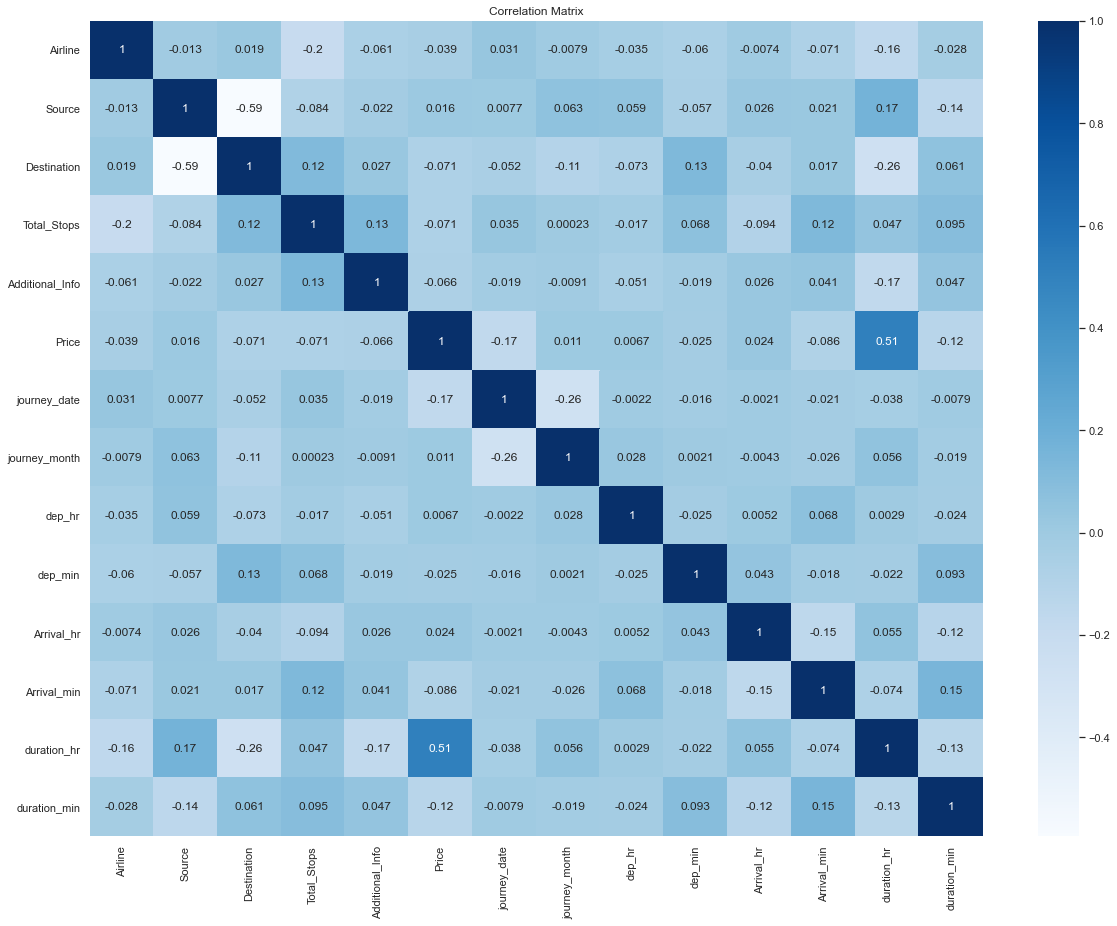

In [42]:
tr = train.corr()
plt.figure(figsize= (20,15))
sns.heatmap(tr, cmap = 'Blues',annot = True)
plt.title("Correlation Matrix")
plt.show()


From the above correlation matrix,we can see there is no correlation between features vs features and features vs target.

In [43]:
train = train.sample(frac =1)      # shuffling the data 

Splitting X and Y variables,

In [44]:
X = train.drop(columns =['Price'],axis = 1)
y = train['Price']

Train Test Split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 555)

As we are finally done with the data cleaning, feature engineering steps.Finally our data is ready for train and build the model.

We are building the Regression model here as our target variable is continuous and also We have r2 score to check the accuracy.

Apart from this,to check the model is over-foit or under-fit,We have cross validation score to check the accuracy further.

Model 1 : Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
scr_rfr = cross_val_score(rfr,X,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rfr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", rfr.score(x_train,y_train))
print("Test Score", rfr.score(x_test,y_test))

r2_Score 0.8766215750971296
CV Score 0.8745963412721689
MSE 2713217.988371084
RMSE 1647.184867697334
Train Score 0.9788743538575347
Test Score 0.8766215750971296


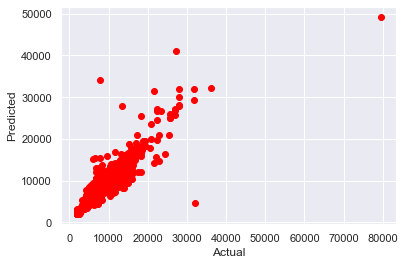

In [47]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Model 2: Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
scr_dtr = cross_val_score(dtr,X,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_dtr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", dtr.score(x_train,y_train))
print("Test Score", dtr.score(x_test,y_test))

r2_Score 0.8010424188474445
CV Score 0.8037536155966507
MSE 4375281.079580018
RMSE 2091.7172561271323
Train Score 0.9963159023424722
Test Score 0.8010424188474445


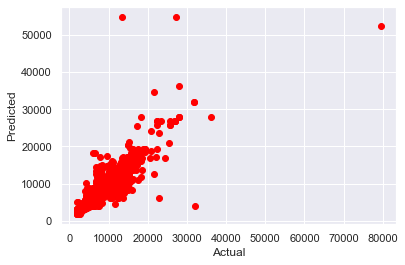

In [51]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Model 3: K Neighbors Regressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
scr_knr = cross_val_score(knr,X,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_knr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

r2_Score 0.6232054901424795
CV Score 0.6180513069321327
MSE 8286097.369695836
RMSE 2878.558210232309
Train Score 0.7616134034506762
Test Score 0.6232054901424795


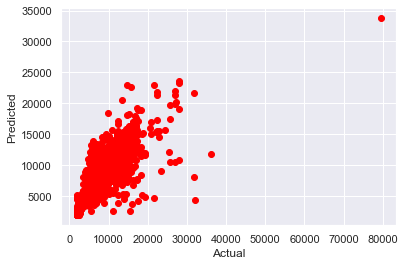

In [54]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Model 4 : Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
scr_gbr = cross_val_score(gbr,X,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gbr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", gbr.score(x_train,y_train))
print("Test Score", gbr.score(x_test,y_test))

r2_Score 0.8270029413320392
CV Score 0.816259366348933
MSE 3804382.5886310083
RMSE 1950.4826553012483
Train Score 0.829087206810952
Test Score 0.8270029413320392


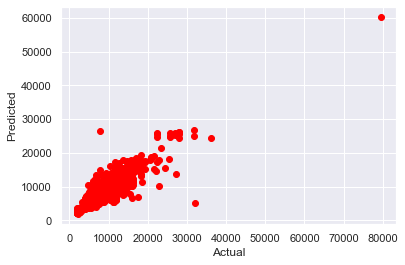

In [56]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

I am choosing random forest as best model as decision tree and random forest has same difference but looking upon the training score,Random Forest is considered as best model.

Comparing the accuracy r2 score and cv score,the model with less difference is considered as best model.

Applying Hyper parameter Tuning to check the model accuracy improvement.Lets see whether our model increasing or not,

In [59]:
param = {'n_estimators': [100], 'criterion':['mse'], 'max_depth':[2,4,6,8,10,12], 'min_samples_split':[2],
         'min_samples_leaf':[1],
      'max_leaf_nodes':[3,6,9,12,15],'random_state':[None],
          'max_samples':[2,4,6,8,10,12,]
        }

In [60]:
gs = GridSearchCV(rfr,param_grid = param, cv=5)

In [61]:
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_leaf_nodes': 6,
 'max_samples': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': None}

In [108]:
final = RandomForestRegressor(n_estimators = 100, max_depth=250 , criterion = 'mse', 
                              min_samples_split = 18, max_leaf_nodes=665, max_samples= 1000 ,random_state=666 )
final.fit(x_train,y_train)
y_pred = final.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("Train Score", final.score(x_train,y_train))
print("Test Score", final.score(x_test,y_test))

r2_Score 0.772534095876472
Train Score 0.8084758121044462
Test Score 0.772534095876472


Our hyper paramater accuracy is 80%  whereas our model score accuracy is  87% which is good.

Text(0, 0.5, 'Predicted')

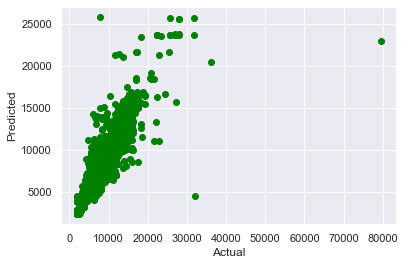

In [109]:
plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")

We can see that model is linear and distance between residuals and best fit line is less and that proves that model is good,even though we can see some points far from the best fit line but very few.

In [110]:
fin = pd.DataFrame({'Actual':y_test,'Predict': y_pred})
fin

,Actual,Predict
7726,5403,5292.412830
6257,5510,5189.883455
2608,11542,10978.453264
9469,8476,8962.463852
8111,12373,12113.111342
...,...,...
8574,5883,6567.597108
7793,15129,14352.117609
10326,11791,11816.178431
10552,12384,10785.235104


Saving the model.pkl file

In [111]:
import joblib
joblib.dump(final,"Flight_price.pkl")

['Flight_price.pkl']

Loading the Test Data,

In [112]:
model = joblib.load("Flight_price.pkl")
prediction = model.predict(test)
prediction = pd.DataFrame(prediction)

In [117]:
prediction.to_excel("flight_price_prediction.xlsx", index = False)